# EDA du Projet "Étude de Prix des Vins sur le Marché Américain"

## 1. Importation des Bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('ggplot')
sns.set_palette('pastel')

## 2. Chargement des Données

In [3]:
# Chemins des fichiers
chemin_donnees_brutes = "../data/brut/wine_certif.csv"
chemin_domaine_des_croix = "../data/brut/domaine_des_croix_certif.csv"

# Chargement des données
try:
    donnees_vins = pd.read_csv(chemin_donnees_brutes)
    domaine_des_croix = pd.read_csv(chemin_domaine_des_croix)
    print("Données chargées avec succès !")
except Exception as e:
    print(f"Erreur lors du chargement des données : {e}")

Données chargées avec succès !


## 3. Inspection et Nettoyage des Données

### Dataset : `donnees_vins`

#### Inspection des données

In [3]:
donnees_vins.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# Informations générales sur les datasets
donnees_vins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


- **129 957 bouteilles de vin** répertoriées.  

- **Beaucoup de valeurs manquantes**, notamment pour :
  - `price` (≈9 000 valeurs manquantes), ce qui peut impacter l'analyse des prix.  
  
  - `region_2` (plus de la moitié des valeurs manquantes), probablement une subdivision moins utilisée.  
  - `taster_name` et `taster_twitter_handle`, suggérant que toutes les bouteilles n’ont pas été évaluées par des critiques connus.  
- **Les colonnes clés (`points`, `price`, `variety`, `country`) semblent exploitables** pour l’analyse du marché.  
- **Types de données bien définis** (majoritairement `object` pour les catégories et `int64/float64` pour les scores et prix).  

In [5]:
# Statistiques descriptives
donnees_vins.describe()

,points,price
count,129957.000000,120964.000000
mean,88.446655,36.390827
std,3.039481,32.802430
min,80.000000,2.000000
25%,86.000000,21.000000
50%,88.000000,29.000000
75%,91.000000,42.000000
max,100.000000,1902.000000


- **Notes des vins (`points`)** :  
  - Moyenne : **88.45**, ce qui correspond à une notation généralement bonne.  

  - Écart-type faible (**3.04**), indiquant une faible dispersion des notes.  
  - Plage : **80 à 100**, signifiant que tous les vins sont bien notés, aucun vin en dessous de 80.  

- **Prix des vins (`price`)** :  
  - Moyenne : **36.39$**, mais l’écart-type est élevé (**32.80 $**), montrant une forte variabilité des prix. 
   
  - Médiane (**29$**) et 75e percentile (**42$**) indiquent que la majorité des vins se situent sous **42 $**.  
  - Valeur maximale très élevée (**1 902 $**), montrant la présence de vins de luxe qui influencent la moyenne.  

In [6]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(donnees_vins.isnull().sum())


Valeurs manquantes par colonne :
country                     63
description                  0
designation              37460
points                       0
price                     8993
province                    63
region_1                 21247
region_2                 79446
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


- **`price` (≈9 000 valeurs manquantes)** : Problématique pour l’analyse → Imputer avec la médiane par cépage/région ou supprimer si données trop incomplètes.  

- **`region_2` (manquant à plus de 50%)** : Variable probablement peu utile → À supprimer.  
- **`designation` & `taster_name` (manquants partiels)** : Informations secondaires → À garder si elles ajoutent de la valeur à l’analyse.  
- **Autres colonnes (`country`, `province`, `region_1`)** : Peu de valeurs manquantes → Compléter si possible avec les données existantes.  

**A faire :** Nettoyer en priorisant les variables clés (`price`, `country`, `variety`) et supprimer celles trop incomplètes ou non essentielles.

In [7]:
# Vérification des doublons
print(f"\nNombre de doublons dans le dataset : {donnees_vins.duplicated().sum()}")


Nombre de doublons dans le dataset : 9982


- **9 982 doublons détectés**, soit environ **7,7% du dataset** à supprimer pour éviter de fausser l’analyse.

#### Nettoyage des données

In [9]:
# Suppression des doublons
donnees_vins = donnees_vins.drop_duplicates()

In [10]:
# Nettoyage des valeurs manquantes
donnees_vins.isnull().sum()

country                     59
description                  0
designation              34541
points                       0
price                     8392
province                    59
region_1                 19560
region_2                 73206
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

In [11]:
# Suppression des lignes avec 'country' manquant
donnees_vins = donnees_vins.dropna(subset=['country'])

# Peu de valeurs manquantes, suppression sans impact significatif sur l’analyse.

In [13]:
# Valeurs manquantes de 'designation' (remplacement par 'Inconnu')
donnees_vins['designation'] = donnees_vins['designation'].fillna('Inconnu')

# Champ descriptif souvent vide, remplacement par une valeur neutre pour éviter les NaN.

In [15]:
# Imputation des valeurs manquantes de 'price' par la médiane
mediane_prix = donnees_vins['price'].median()
donnees_vins['price'] = donnees_vins['price'].fillna(mediane_prix)

# Les prix sont essentiels → remplacement par la médiane pour ne pas fausser la distribution.

In [16]:
# 🏷️ Suppression des lignes où 'province' est manquant
donnees_vins = donnees_vins.dropna(subset=['province'])

# Peu de valeurs manquantes.

In [17]:
# Suppression de la colonne 'region_2' (trop de valeurs manquantes)
donnees_vins = donnees_vins.drop(columns=['region_2'])

# Plus de 50% de valeurs manquantes → pas exploitable.

In [18]:
# Remplacement des valeurs manquantes de 'region_1' par 'Non spécifié'
donnees_vins['region_1'] = donnees_vins['region_1'].fillna('Non spécifié')

# Beaucoup de valeurs manquantes mais l’info régionale peut être utile

In [20]:
# Remplacement des valeurs manquantes de 'taster_name' par 'Anonyme'
donnees_vins['taster_name'] = donnees_vins['taster_name'].fillna('Anonyme')

# Critique du vin parfois inconnue

In [21]:
# Suppression de la colonne 'taster_twitter_handle' (info peu pertinente)
donnees_vins = donnees_vins.drop(columns=['taster_twitter_handle'])

# Donnée non essentielle, allègement du dataset

In [22]:
# Suppression de la ligne avec 'variety' manquante
donnees_vins = donnees_vins.dropna(subset=['variety'])

# Une seule valeur manquante

In [28]:
donnees_vins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119915 entries, 0 to 129956
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      119915 non-null  object 
 1   description  119915 non-null  object 
 2   designation  119915 non-null  object 
 3   points       119915 non-null  int64  
 4   price        119915 non-null  float64
 5   province     119915 non-null  object 
 6   region_1     119915 non-null  object 
 7   taster_name  119915 non-null  object 
 8   title        119915 non-null  object 
 9   variety      119915 non-null  object 
 10  winery       119915 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 11.0+ MB


In [ ]:
# Ajout d'une colonne 'Année'

import re
import numpy as np

# Extraction directe avec regex
donnees_vins['Année'] = donnees_vins['title'].str.extract(r'(2\d{3})', expand=False).astype("Int64")

# expression régulière pour extraire une séquence commençant par 2 suivies de 3 chiffres

In [23]:
# Fin du nettoyage, exportation du dataset nettoyé
donnees_vins.to_csv("../data/propre/wine_data_propre.csv", index=False)

### Dataset : `domaine_des_croix`

#### Inspection des données

In [29]:
domaine_des_croix.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


In [30]:
domaine_des_croix['description'].value_counts()

description
Firm and solid with great swathes of black fruits as well as dense tannins. Ripe fruits are a major element of this concentrated wine. The wine has power and a firm tannic core, and certainly needs aging for seven years.    1
Name: count, dtype: int64

- **Seulement 14 vins répertoriés**, ce qui est un échantillon très restreint.  
- **Aucune donnée sur les prix (`price` entièrement manquant)**, rendant l'estimation complexe.  
- **`region_2` également vide**, probablement une information non pertinente pour ce domaine.  
- **`designation` manquante pour certains vins**, mais les autres colonnes semblent complètes.  
- **Les notes (`points`) sont bien renseignées**, ce qui permettra une comparaison avec le marché global.

In [26]:
domaine_des_croix.describe()

,designation,points,price,region_2
count,0.0,1.0,0.0,0.0
mean,NaN,94.0,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,94.0,NaN,NaN
25%,NaN,94.0,NaN,NaN
50%,NaN,94.0,NaN,NaN
75%,NaN,94.0,NaN,NaN
max,NaN,94.0,NaN,NaN


- **Notes des vins (`points`)** :
  - Moyenne élevée (**92.93**), indiquant des vins de qualité supérieure.
  
  - Faible dispersion (**écart-type de 1.86**), ce qui montre une notation homogène.
  - Notes comprises entre **90 et 95**, sans vins mal notés.

- **Prix (`price`)** :
  - **Aucune donnée disponible**, c'est ce que nous devons préconiser.

- **Région secondaire (`region_2`)** :
  - **Entièrement vide**, donc inutile pour l'analyse.

**A Faire : Supprimer `region_2`** (aucune donnée exploitable).

In [27]:
print("\nValeurs manquantes par colonne (Domaine des Croix) :")
print(domaine_des_croix.isnull().sum())


Valeurs manquantes par colonne (Domaine des Croix) :
country                  0
description              0
designation              1
points                   0
price                    1
province                 0
region_1                 0
region_2                 1
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64


- **`price` entièrement manquant** → OK.  
- **`region_2`** → Information non pertinente pour ce domaine.  
- **`designation` manquante pour 5 vins** → Peut être remplacée par une valeur générique (`Inconnu`).

In [77]:
# Vérification des doublons
print(f"\nNombre de doublons dans le dataset Domaine des Croix : {domaine_des_croix.duplicated().sum()}")


Nombre de doublons dans le dataset Domaine des Croix : 0


#### Nettoyage des Données

In [104]:
# Suppression de la colonne 'taster_twitter_handle' (info peu pertinente)
domaine_des_croix = domaine_des_croix.drop(columns=['taster_twitter_handle'])

# Donnée non essentielle, allègement du dataset

In [83]:
# Remplacement des valeurs manquantes de 'designation' par 'Inconnu'
domaine_des_croix['designation'] = domaine_des_croix['designation'].fillna('Inconnu')

# Certaines bouteilles n’ont pas de désignation spécifique ; remplacement par 'Inconnu'.

In [84]:
# Suppression de la colonne 'region_2' (aucune donnée disponible)
domaine_des_croix = domaine_des_croix.drop(columns=['region_2'])

In [86]:
domaine_des_croix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                14 non-null     object 
 1   description            14 non-null     object 
 2   designation            14 non-null     object 
 3   points                 14 non-null     int64  
 4   price                  0 non-null      float64
 5   province               14 non-null     object 
 6   region_1               14 non-null     object 
 7   taster_name            14 non-null     object 
 8   taster_twitter_handle  14 non-null     object 
 9   title                  14 non-null     object 
 10  variety                14 non-null     object 
 11  winery                 14 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.4+ KB


In [ ]:
# Ajout d'une colonne 'Année'

import re
import numpy as np

# Extraction directe avec regex
domaine_des_croix['Année'] = domaine_des_croix['title'].str.extract(r'(2\d{3})', expand=False).astype("Int64")

# expression régulière pour extraire une séquence commençant par 2 suivies de 3 chiffres

In [115]:
# Fin du nettoyage, exportation du dataset nettoyé
domaine_des_croix.to_csv("../data/propre/domaine_des_croix_propre.csv", index=False)

## 4️. Analyse Exploratoire des Variables Clés

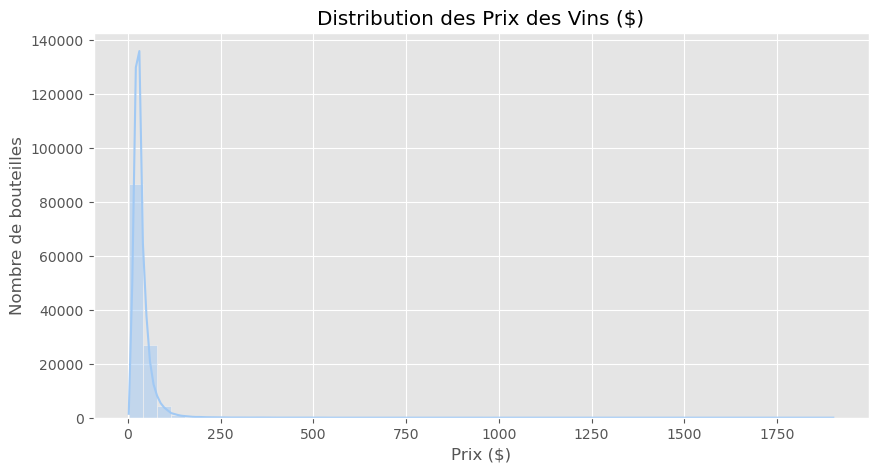

In [108]:
# Distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(donnees_vins['price'].dropna(), bins=50, kde=True)
plt.title("Distribution des Prix des Vins ($)")
plt.xlabel("Prix ($)")
plt.ylabel("Nombre de bouteilles")
plt.show()

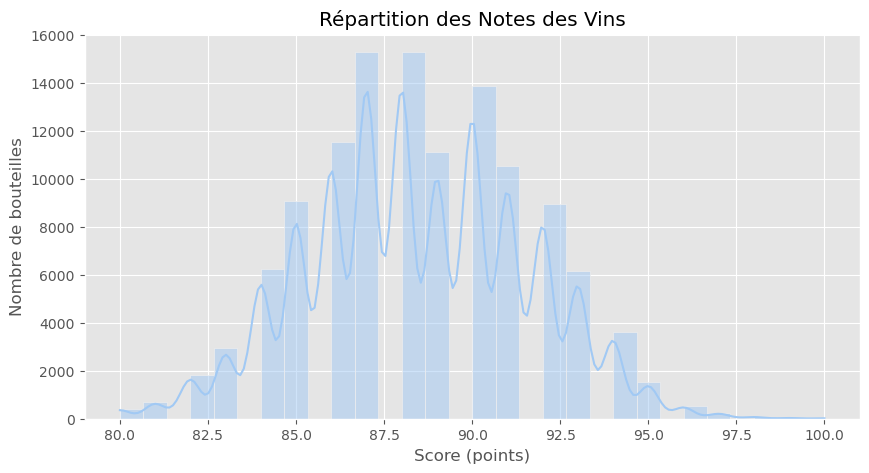

In [109]:
# Distribution des notes des vins
plt.figure(figsize=(10, 5))
sns.histplot(donnees_vins['points'].dropna(), bins=30, kde=True)
plt.title("Répartition des Notes des Vins")
plt.xlabel("Score (points)")
plt.ylabel("Nombre de bouteilles")
plt.show()

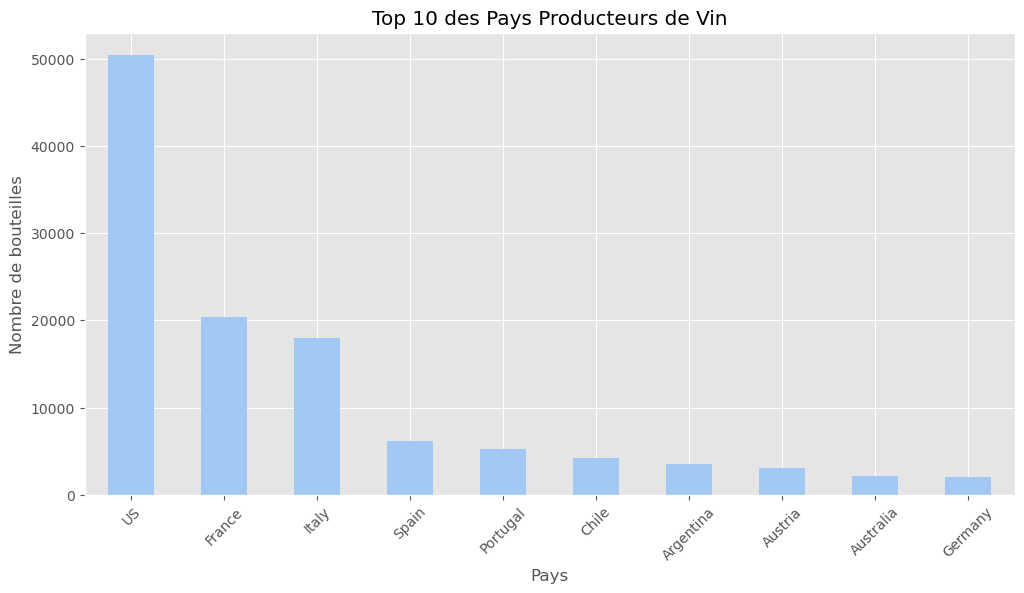

In [110]:
# Répartition des vins par pays
plt.figure(figsize=(12, 6))
donnees_vins['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des Pays Producteurs de Vin")
plt.xlabel("Pays")
plt.ylabel("Nombre de bouteilles")
plt.xticks(rotation=45)
plt.show()

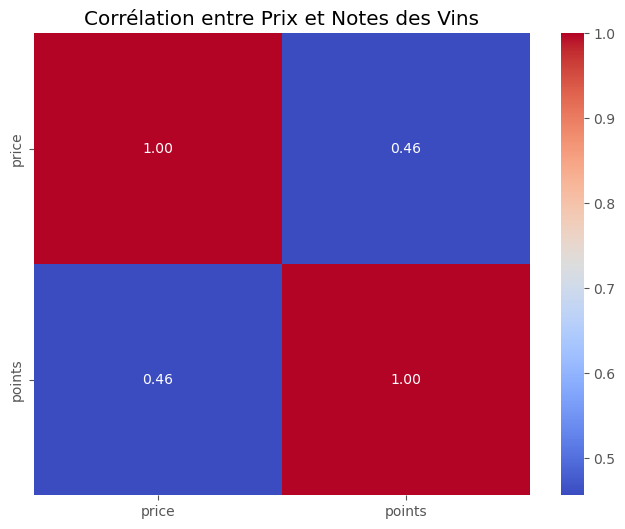

In [111]:
# Corrélation entre les variables numériques
plt.figure(figsize=(8, 6))
sns.heatmap(donnees_vins[['price', 'points']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation entre Prix et Notes des Vins")
plt.show()

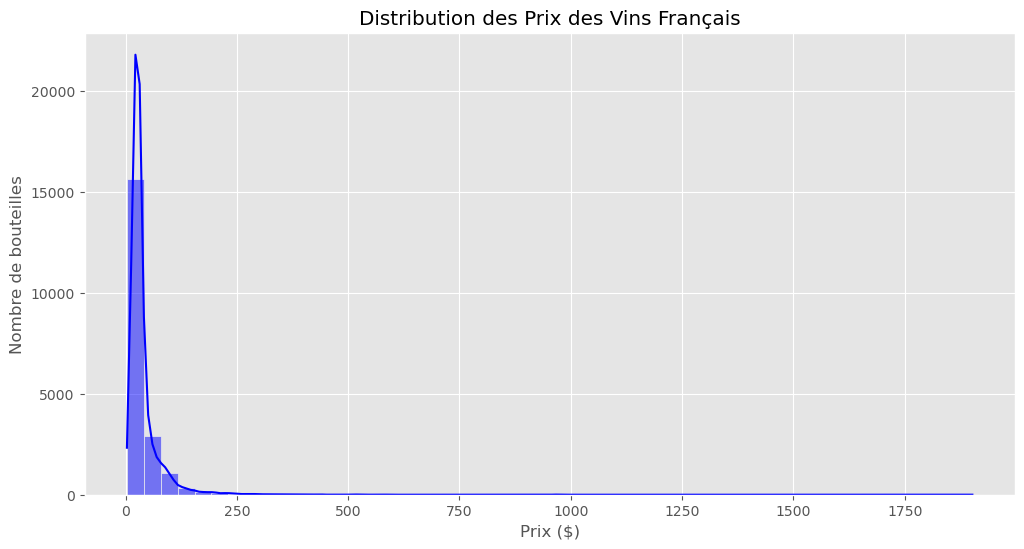

In [118]:
# Distribution des prix avec un focus sur la France
plt.figure(figsize=(12, 6))
sns.histplot(donnees_vins[donnees_vins['country'] == 'France']['price'].dropna(), bins=50, kde=True, color='blue')
plt.title("Distribution des Prix des Vins Français")
plt.xlabel("Prix ($)")
plt.ylabel("Nombre de bouteilles")
plt.show()

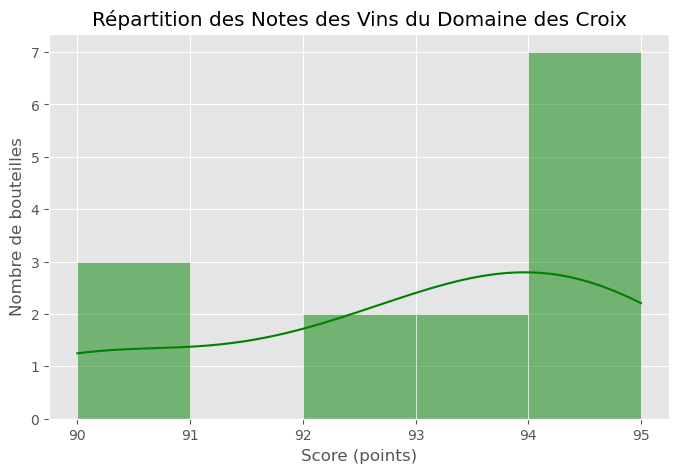

In [119]:
# Distribution des notes des vins du Domaine des Croix
plt.figure(figsize=(8, 5))
sns.histplot(domaine_des_croix['points'], bins=5, kde=True, color='green')
plt.title("Répartition des Notes des Vins du Domaine des Croix")
plt.xlabel("Score (points)")
plt.ylabel("Nombre de bouteilles")
plt.show()

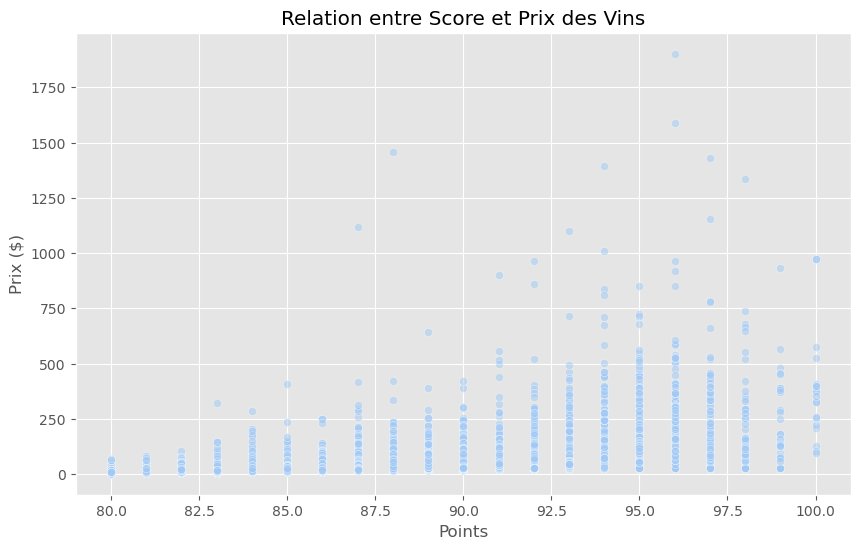

In [120]:
# Relation entre les notes et les prix sur le marché global
plt.figure(figsize=(10, 6))
sns.scatterplot(data=donnees_vins, x='points', y='price', alpha=0.5)
plt.title("Relation entre Score et Prix des Vins")
plt.xlabel("Points")
plt.ylabel("Prix ($)")
plt.show()

### 5️. Premières Conclusions

**Distribution des prix des vins**  
   - Forte concentration de bouteilles sous **50$**, avec quelques outliers dépassant **1000$**.

   - Les prix sont **très asymétriques**, nécessitant une transformation pour les modèles prédictifs.  

**Répartition des notes des vins**  
   - La majorité des vins sont **entre 85 et 95 points**, rares en dessous de 80.  

   - **Le Domaine des Croix** se situe dans la tranche supérieure (**90-95 points**), renforçant son positionnement premium.  

**Top pays producteurs**  
   - **Les États-Unis dominent**, suivis par la France et l'Italie.  

   - Intéressant pour comparer le positionnement du **Domaine des Croix** par rapport aux autres vins français.  

**Corrélation entre prix et notes**  
   - Relation **positive modérée** (**0.46**) entre le prix et la note, mais d'autres facteurs influencent le prix.  

**Distribution des prix des vins français**  
   - Structure similaire au marché global, avec une majorité sous **50$** et une queue longue.  

   - Comparer la Bourgogne aux autres régions françaises serait pertinent.  

**Notes du Domaine des Croix**  
   - Tous les vins notés **90+ points**, cohérent avec un positionnement premium.  

   - Nécessité de **fixer un prix en fonction du marché des vins haut de gamme**.  

**Relation entre prix et score**  
   - Les vins **95+ points peuvent atteindre des prix très élevés**, bien au-delà de 500$.  

   - L'absence des prix pour le **Domaine des Croix** nécessite une estimation par comparaison.  

##### **Implications pour la suite**  
- **Estimer le prix des vins du Domaine des Croix** en comparant avec des vins similaires de Bourgogne.  

- **Explorer d'autres variables influençant le prix** : cépage, région, critiques des dégustateurs.  

- **Modélisation à prévoir** : transformation des prix (log), choix de modèles adaptés (régression ?).